In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns

In [102]:
sz = 1795*2
Z = np.zeros((sz-1, 4))
grps = { i: (1, 0) for i in range(sz) }
for i in range(sz-1):
    a, b = tuple(np.random.choice(list(grps.keys()), 2, False))
    a_s, a_d = grps[a]
    b_s, b_d = grps[b]
    del grps[a]
    del grps[b]
    d = a_d + b_d + np.random.normal()**2
    s = a_s + b_s
    grps[sz + i] = (s, d)
    Z[i] = [a, b, d, s]
l = Z


['3585',
 '1533',
 '2841',
 '414',
 '2534',
 '916',
 '1947',
 '2330',
 '3',
 '368',
 '3469',
 '1960',
 '1104',
 '2098',
 '411',
 '1107',
 '1649',
 '2833',
 '2288',
 '1478',
 '79',
 '1103',
 '2056',
 '2190',
 '1876',
 '506',
 '2681',
 '406',
 '1143',
 '1834',
 '2090',
 '3199',
 '2030',
 '1693',
 '1618',
 '637',
 '3273',
 '1952',
 '628',
 '2968',
 '2488',
 '1733',
 '3258',
 '793',
 '3170',
 '2972',
 '2170',
 '2978',
 '3482',
 '1670',
 '38',
 '827',
 '3230',
 '1744',
 '474',
 '872',
 '1004',
 '17',
 '3442',
 '1445',
 '687',
 '683',
 '3428',
 '2594',
 '3327',
 '2286',
 '1095',
 '2388',
 '302',
 '3165',
 '3347',
 '1075',
 '1480',
 '731',
 '90',
 '1662',
 '1253',
 '1320',
 '3499',
 '1051',
 '1069',
 '181',
 '2037',
 '639',
 '2665',
 '1841',
 '2144',
 '201',
 '1462',
 '333',
 '2402',
 '343',
 '1354',
 '2502',
 '977',
 '1084',
 '1190',
 '98',
 '624',
 '3319',
 '2092',
 '3173',
 '1251',
 '3551',
 '1712',
 '1029',
 '1736',
 '2453',
 '2860',
 '1011',
 '607',
 '431',
 '1191',
 '945',
 '833',
 '244

/var/folders/fz/l55ysstj2xz0ztbjc3m17db00000gq/T/ipykernel_74843/1713517718.py:17: RuntimeWarning: divide by zero encountered in power
  (8e7*(A[:,1]-725.)**(-2) < np.random.uniform(sz))


(0.0, 35900.0)

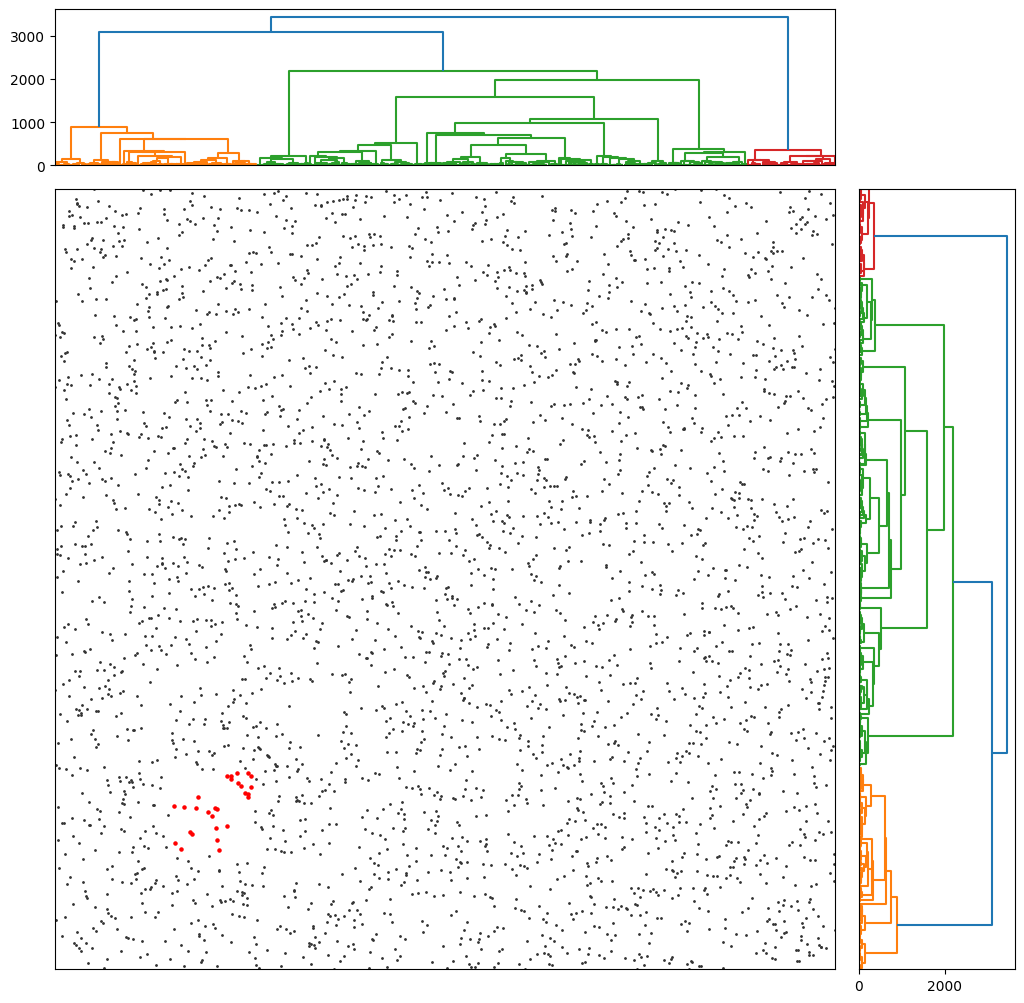

In [206]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
axh = fig.add_subplot(gs[0, 0], sharex=ax)
axv = fig.add_subplot(gs[1, 1], sharey=ax)
da = hierarchy.dendrogram(l, no_labels=True, ax=axh, orientation='top')
db = hierarchy.dendrogram(l, no_labels=True, ax=axv, orientation='right')
cnva = { int(j): i for i, j in enumerate(da["ivl"])}
cnvb = { int(j): i for i, j in enumerate(db["ivl"])}
A = np.vectorize(cnva.get)(np.arange(sz).reshape(-1, 2))
B = np.vectorize(cnvb.get)(np.arange(sz).reshape(-1, 2))
c = 10
sel = (
    (8e7*(A[:,0]-725.)**(-2) < np.random.uniform(sz)) |
    (8e7*(A[:,1]-725.)**(-2) < np.random.uniform(sz))
)
ax.scatter(A[sel, 0]*c, B[sel, 1]*c, s=1, color="#333")
ax.scatter(A[sel, 1]*c, B[sel, 0]*c, s=1, color="#333")
ax.scatter(A[~sel, 0]*c, B[~sel, 1]*c, s=5, color="#f00")
ax.scatter(A[~sel, 1]*c, B[~sel, 0]*c, s=5, color="#f00")
ax.get_xlim()